In [24]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
confirmed_cases_path = "csse_covid_19_data\\csse_covid_19_time_series\\time_series_19-covid-Confirmed.csv"
deaths_path = "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
cured_path = "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [7]:
confirmed_cases = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), confirmed_cases_path))
confirmed_cases.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20   ...    2/29/20  3/1/20  3/2/20  \
0       15       39       60       70   ...        990     990     990   
1       36       41       68       80   ...        411     413     414   
2       27       57       75      110   ...        576     576     576   
3       10       18       35       59   ...        296     296     296   
4        2        4        7       14   ...         91      91      91   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
0     990     990     990     990     990     990     990  
1     414     418     418     422     426     428     428  
2     576     576     576     576     576     576     576  
3     296     296     296     296     296     296     296  
4      91      91     102     119     120     124     124  

[5 rows x 52 columns]

In [8]:
deaths_data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), deaths_path))
deaths_data.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20   ...    2/29/20  3/1/20  3/2/20  \
0        0        0        0        0   ...          6       6       6   
1        0        0        0        1   ...          8       8       8   
2        0        0        0        0   ...          6       6       6   
3        0        0        0        0   ...          1       1       1   
4        0        0        0        0   ...          2       2       2   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
0       6       6       6       6       6       6       6  
1       8       8       8       8       8       8       8  
2       6       6       6       6       6       6       6  
3       1       1       1       1       1       1       1  
4       2       2       2       2       2       2       2  

[5 rows x 52 columns]

In [9]:
recovered_cases = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), cured_path))
recovered_cases.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20   ...    2/29/20  3/1/20  3/2/20  \
0        0        0        0        0   ...        868     873     917   
1        1        2        2        2   ...        271     276     282   
2        0        0        0        0   ...        438     450     469   
3        0        0        0        0   ...        243     247     255   
4        0        0        0        0   ...         82      84      85   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
0     936     956     970     979     979     984     984  
1     288     297     297     299     303     308     315  
2     490     502     512     513     526     527     542  
3     260     270     277     284     295     295     295  
4      86      87      87      87      87      87      88  

[5 rows x 52 columns]

#### Let us the growth of number of cases per each day over the entire world

In [10]:
days_columns = confirmed_cases.columns[4:]

In [11]:
world_cases_growth = confirmed_cases[days_columns].sum(axis = 0).reset_index()
world_cases_growth.columns = ['Date', 'Count']

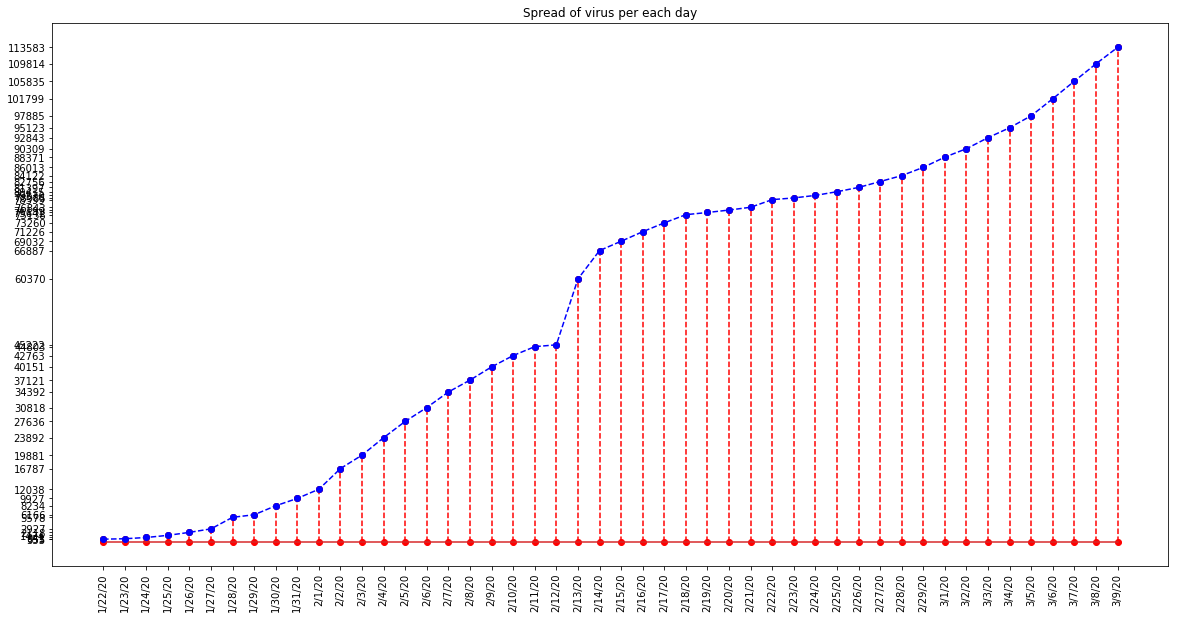

In [115]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.stem(world_cases_growth['Date'], world_cases_growth['Count'], '--ro')
plt.plot(world_cases_growth['Date'], world_cases_growth['Count'], '--bo')
plt.title("Spread of virus per each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.yticks(world_cases_growth['Count'])
plt.show()

##### Sudden spike can be seen from 12-Feb to 13-Feb almost 15000 cases were identified in just a single day .

#### Parallelly let us compare the active cases to # of deaths on each day

In [12]:
world_cases_growth['deaths'] = deaths_data[days_columns].sum(axis = 0).reset_index(drop = True)

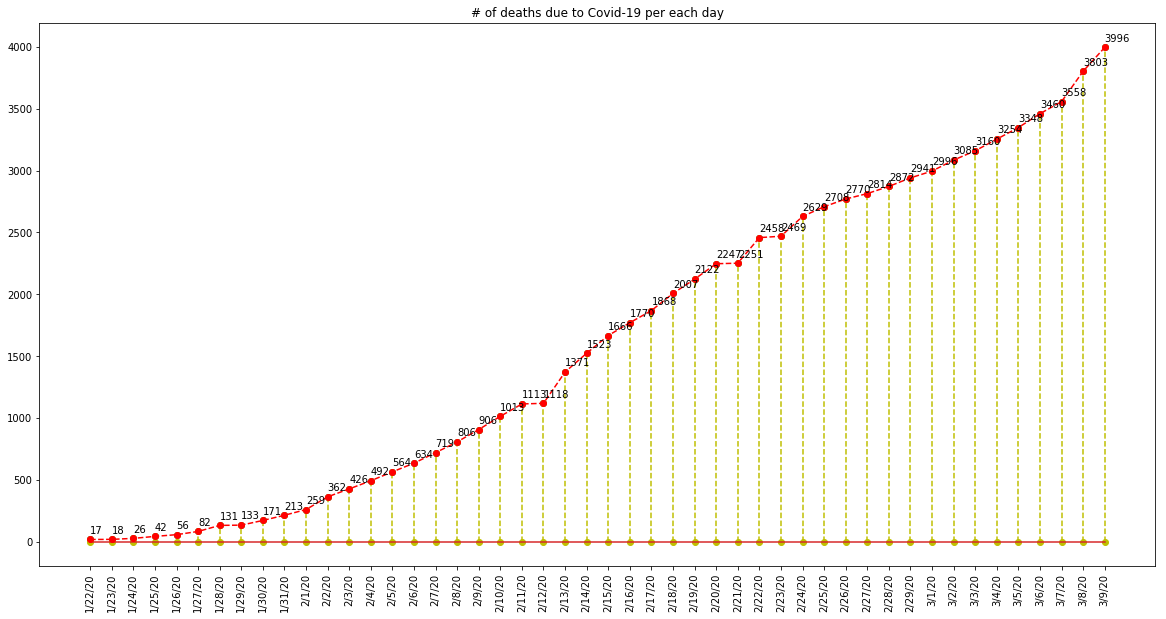

In [156]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['deaths'], '--yo')
plt.plot(world_cases_growth['Date'], world_cases_growth['deaths'], '--ro')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'deaths']+50, 
             world_cases_growth.loc[i,'deaths'])
plt.title("# of deaths due to Covid-19 per each day")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

#### Let us also see how many cases were cured on daily basis

In [13]:
world_cases_growth['recovered'] = recovered_cases[days_columns].sum(axis = 0).reset_index(drop = True)

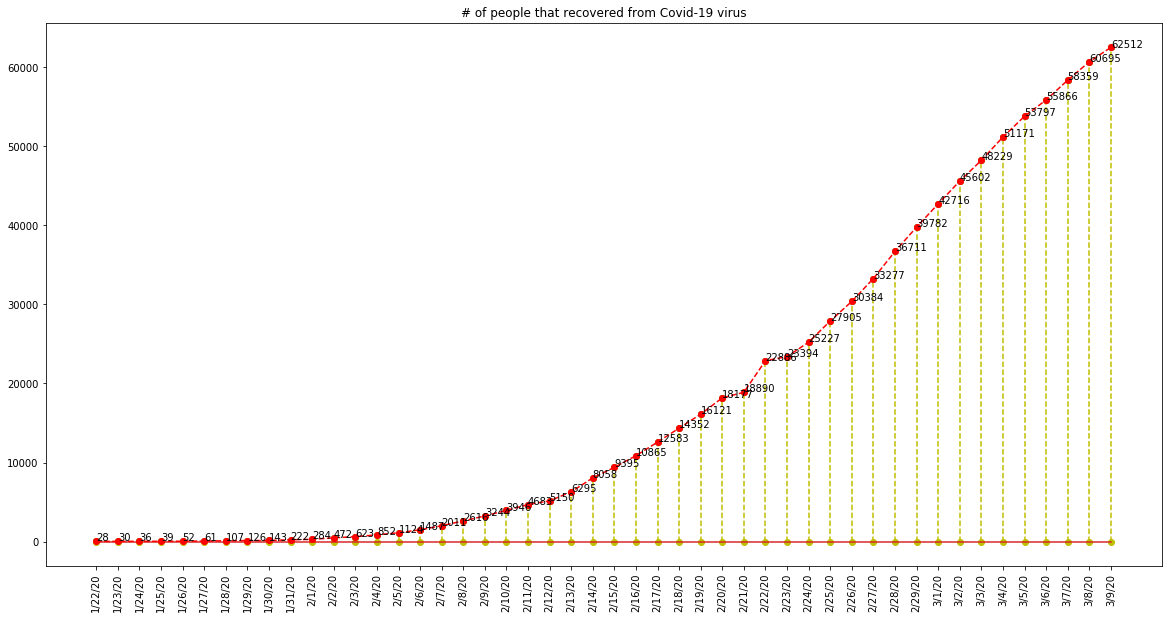

In [157]:
plt.rcParams['figure.figsize'] = [20,10]
plt.stem(world_cases_growth['Date'], world_cases_growth['recovered'], '--yo')
plt.plot(world_cases_growth['Date'], world_cases_growth['recovered'], '--ro')
for i in range(world_cases_growth.shape[0]):
    plt.text(world_cases_growth.loc[i, 'Date'], world_cases_growth.loc[i, 'recovered']+50, 
             world_cases_growth.loc[i,'recovered'])
plt.title("# of people that recovered from Covid-19 virus")
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.show()

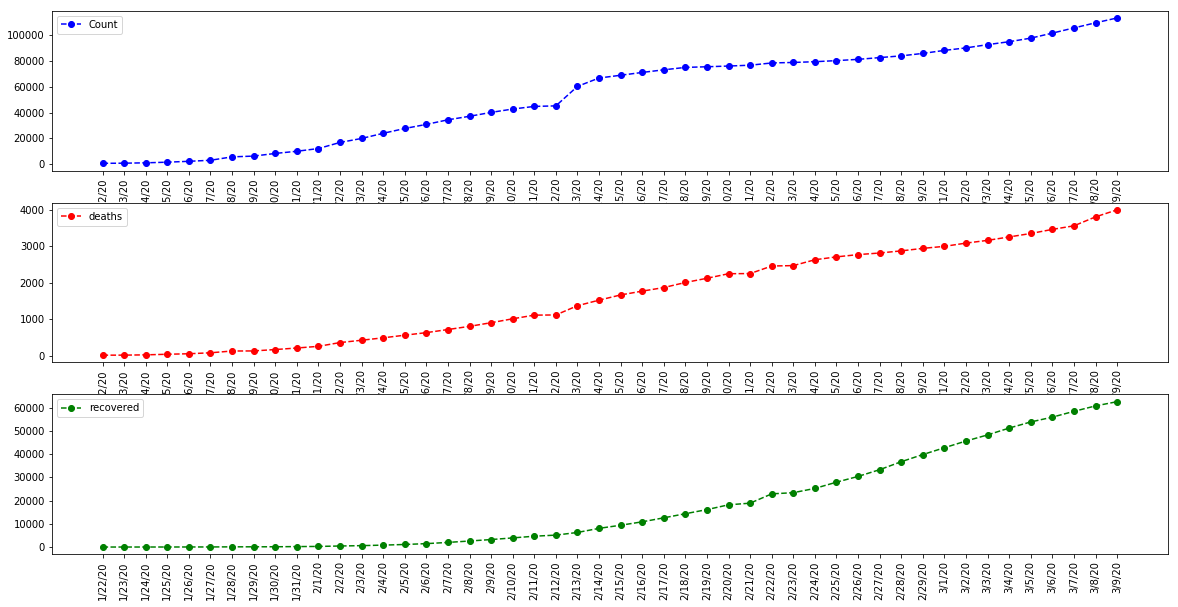

In [161]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure(1)
plt.subplot(311)
plt.plot(world_cases_growth['Date'], world_cases_growth['Count'], '--bo')
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()

plt.subplot(312)
plt.plot(world_cases_growth['Date'], world_cases_growth['deaths'], '--ro')
plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()

plt.subplot(313)
plt.plot(world_cases_growth['Date'], world_cases_growth['recovered'], '--go')

plt.xticks(world_cases_growth['Date'], rotation = 90)
plt.legend()
plt.show()

#### Let us now see the growth of virus in each country

In [16]:
con_cases_growth = confirmed_cases.groupby('Country/Region')[days_columns].agg(np.sum).reset_index()
con_cases_growth.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4      Argentina        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20   ...    2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  \
0        0        0        0   ...          1       1       1       1       1   
1        0        0        0   ...          0       0       0       0       0   
2        0        0        0   ...          1       1       3       5      12   
3        0        0        0   ...          0       0       1       1       1   
4        0        0        0   ...          0       0       0       1       1   

   3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
0       1       1       1       4       4  
1       0       0       0       0       2  
2      12      17      17      19      20  
3       1       1       1       1       1  
4       1       2       8      12      12  

[5 rows x 49 columns]

In [80]:
plt.show()

#### As per the latest data lets see what is the severity of cases in each country

In [31]:
daily_data = "csse_covid_19_data\\csse_covid_19_daily_reports"
daily_data_dir = os.path.join(os.path.dirname(os.getcwd()), daily_data)

daily_data_files = glob.glob(daily_data_dir+'/*.csv')

In [32]:
latest_data = pd.read_csv(daily_data_files[-1])
latest_data.head()

Province/State  Country/Region          Last Update  Confirmed  Deaths  \
0          Hubei  Mainland China  2020-03-09T14:33:03      67743    3008   
1            NaN           Italy  2020-03-09T18:13:11       9172     463   
2            NaN     South Korea  2020-03-09T09:03:03       7478      53   
3            NaN            Iran  2020-03-09T10:53:03       7161     237   
4      Guangdong  Mainland China  2020-03-09T01:43:01       1352       8   

   Recovered  Latitude  Longitude  
0      46488   30.9756   112.2707  
1        724   43.0000    12.0000  
2        118   36.0000   128.0000  
3       2394   32.0000    53.0000  
4       1260   23.3417   113.4244

In [36]:
agg_latest_data = latest_data.groupby('Country/Region')['Confirmed'].agg([np.sum]).reset_index()

In [109]:
manual_dict = {'mainland china' : 'CHN', 'north macedonia' : 'MKD', 'palestine' : 'PSE', 
               'saint barthelemy' : 'FRA', 'south korea' : 'KOR', 'st. martin' : 'PYC', 
               'uk' : 'GBR', 'us' : 'USA', 'vatican city': 'ITA'}
def get_country_code(series):
    df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
    df2 = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'archived_data\\countryCodes.csv'), sep = '\t')
    country_code_dict = {row[1][0].lower() : row[1][2] for row in df.iterrows()}
    added_dict = {row[1][0].lower() : row[1][2] for row in df2.iterrows()}
#     print(country_code_dict)
    res = []
    for key in series:
        if key.lower() in country_code_dict:
            res.append(country_code_dict.get(key.lower(), None))
        elif key.lower() in added_dict:
            res.append(added_dict.get(key.lower(), None))
        else:
            res.append(manual_dict.get(key.lower(), None))
    return res

In [110]:
agg_latest_data['Code'] = get_country_code(agg_latest_data['Country/Region'])

In [111]:
fig = px.scatter_geo(agg_latest_data, locations='Code', color=np.log(agg_latest_data['sum']), 
                     size=np.log(agg_latest_data['sum']), hover_name='Country/Region', 
                     hover_data = ['Country/Region', 'sum'],
                     projection="natural earth", color_continuous_scale = 'Viridis')
fig.update_geos(resolution=110,
    showcountries=True)
fig.show()